In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
os.chdir('C:\\Users\\Wagh\\Desktop\\Data Science\\Files')

In [3]:
df= pd.read_csv('Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
cats= []
for x in df.dtypes.index:
    if (df[x].dtype== 'object'):
        cats.append(x)
cats.remove('Item_Identifier')
cats.remove('Outlet_Identifier')
cats

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
for col in cats:
    print(col , len(df[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [11]:
for col in cats:
    print(col)
    print(df[col].value_counts())
    print()
    print ('*' *50)


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**************************************************
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**************************************************
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: 

In [12]:
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [13]:
df[df['Item_Weight'].isna()]['Item_Identifier'].value_counts()

FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: Item_Identifier, Length: 1142, dtype: int64

In [14]:
df['Item_Weight'].isna().sum()

1463

In [15]:
miss_bool = df['Item_Weight'].isnull()
miss_bool.value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [16]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])


In [17]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Outlet_Size':np.size})

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                528
Supermarket Type1 High                 932
                  Medium               930
                  Small               1860
Supermarket Type2 Medium               928
Supermarket Type3 Medium               935

In [19]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [20]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [21]:
def mode(value,data):
    temp= data[data['Outlet_Type']==value]['Outlet_Size']
    index= set(temp.unique())
    index.discard(np.nan)
    for x in index:
        if (temp.value_counts()[x]==max(list(temp.value_counts().values))):
            return(x)
            break
            

In [22]:
for x in df['Outlet_Type'].unique():
    print(x,':',mode(x,df))

Supermarket Type1 : Small
Supermarket Type2 : Medium
Grocery Store : Small
Supermarket Type3 : Medium


In [23]:
size_bool= df['Outlet_Size'].isna()
size_bool.value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

In [24]:
for i, item in enumerate(df['Outlet_Type']):
    if size_bool[i]:
        df['Outlet_Size'][i]= mode(item,df)

In [25]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Outlet_Size':np.size})

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small               1083
Supermarket Type1 High                 932
                  Medium               930
                  Small               3715
Supermarket Type2 Medium               928
Supermarket Type3 Medium               935

In [27]:
df['Item_Visibility'].mean()

0.06613202877895127

In [28]:
sum(df['Item_Visibility']==0)

526

In [29]:
df['Item_Visibility'].replace([0],df['Item_Visibility'].mean(),inplace=True)

In [30]:
sum(df['Item_Visibility']==0)

0

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'},inplace=True)

In [33]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
df['new_item'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['new_item']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: new_item, Length: 8523, dtype: object

In [35]:
df['new_item'].value_counts()

FD    6125
NC    1599
DR     799
Name: new_item, dtype: int64

In [36]:
df['new_item'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'},inplace=True)

In [37]:
df['new_item'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: new_item, dtype: int64

In [38]:
df.groupby (['new_item','Item_Fat_Content'] ).agg({'Outlet_Type':np.size})

Outlet_Type
new_item       Item_Fat_Content             
Drinks         Low Fat                   728
               Regular                    71
Food           Low Fat                  3190
               Regular                  2935
Non-Consumable Low Fat                  1599

In [39]:
for i in range (0,len(df)):
    if(df['new_item'][i]=='Non-Consumable'):
        df['Item_Fat_Content'][i]= 'Non Edible'

In [40]:
df.groupby (['new_item','Item_Fat_Content'] ).agg({'Outlet_Type':np.size})

Outlet_Type
new_item       Item_Fat_Content             
Drinks         Low Fat                   728
               Regular                    71
Food           Low Fat                  3190
               Regular                  2935
Non-Consumable Non Edible               1599

In [41]:
df['Outlet_Years'] = 2022 - df['Outlet_Establishment_Year']
df['Outlet_Years'] 

0       23
1       13
2       23
3       24
4       35
        ..
8518    35
8519    20
8520    18
8521    13
8522    25
Name: Outlet_Years, Length: 8523, dtype: int64

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,23
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,24
4,NCD19,8.93,Non Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,35


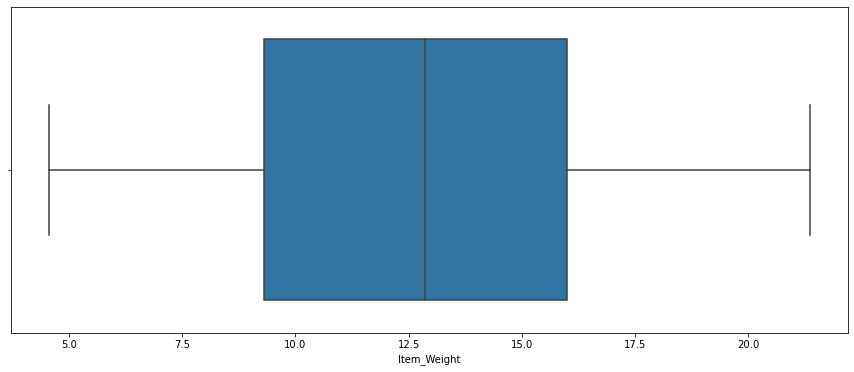

In [43]:
sns.boxplot(df['Item_Weight'])
plt.show()


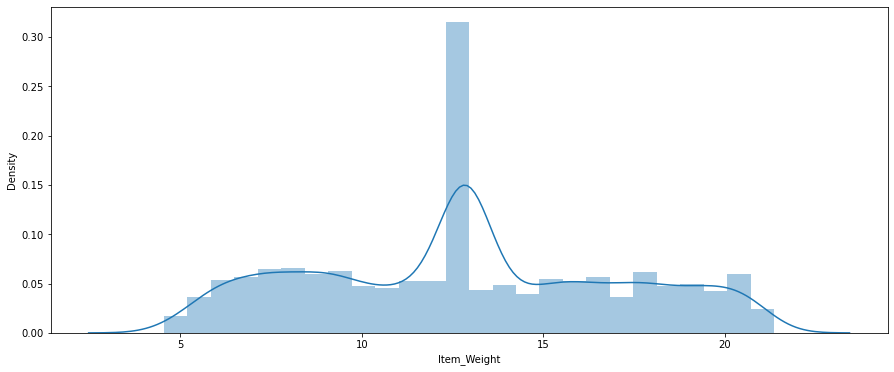

In [44]:
sns.distplot(df['Item_Weight'])
plt.show()

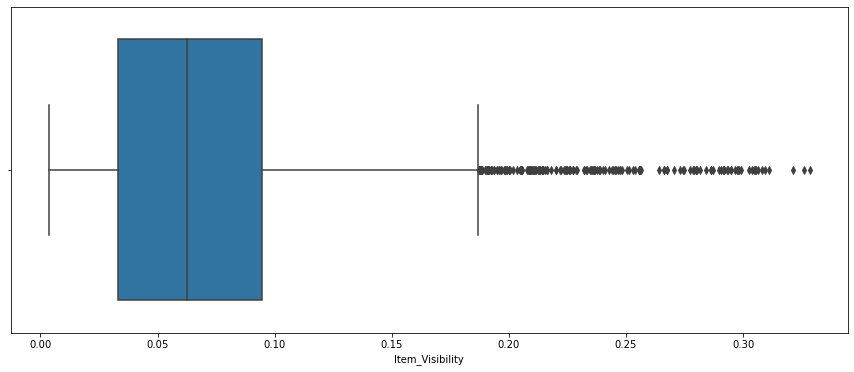

In [45]:
sns.boxplot(df['Item_Visibility'])
plt.show()

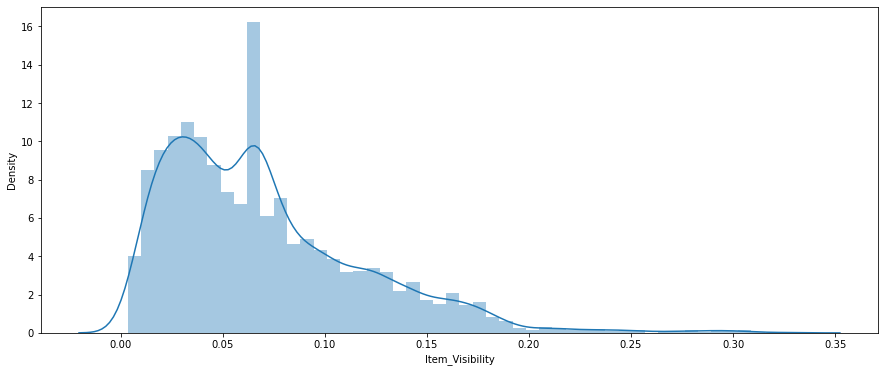

In [46]:
sns.distplot(df['Item_Visibility'])
plt.show()

In [47]:
df['Item_Visibility']= np.log10(df['Item_Visibility'])

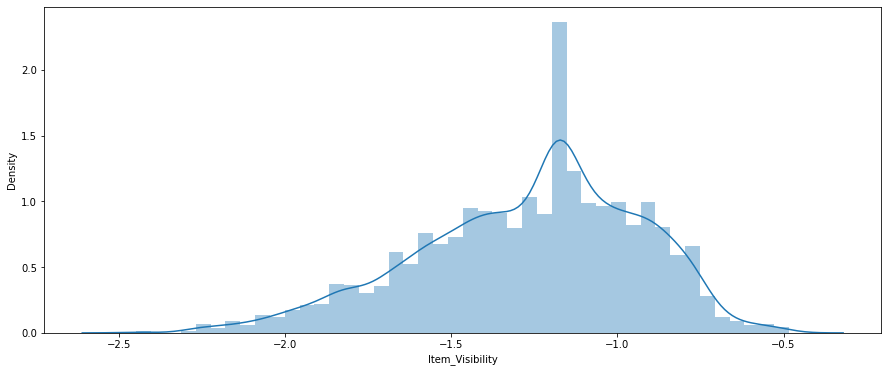

In [48]:
sns.distplot((df['Item_Visibility']))
plt.show()

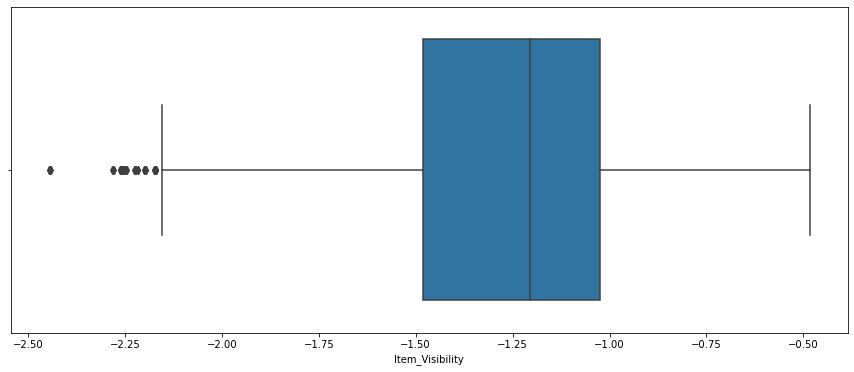

In [49]:
sns.boxplot((df['Item_Visibility']))
plt.show()

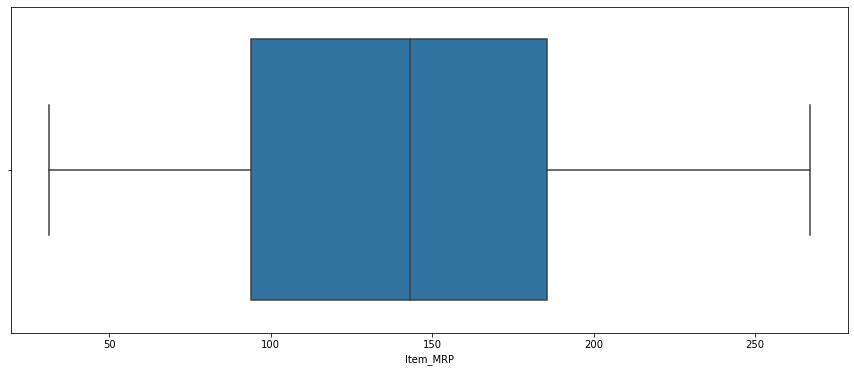

In [50]:
sns.boxplot(df['Item_MRP'])
plt.show()

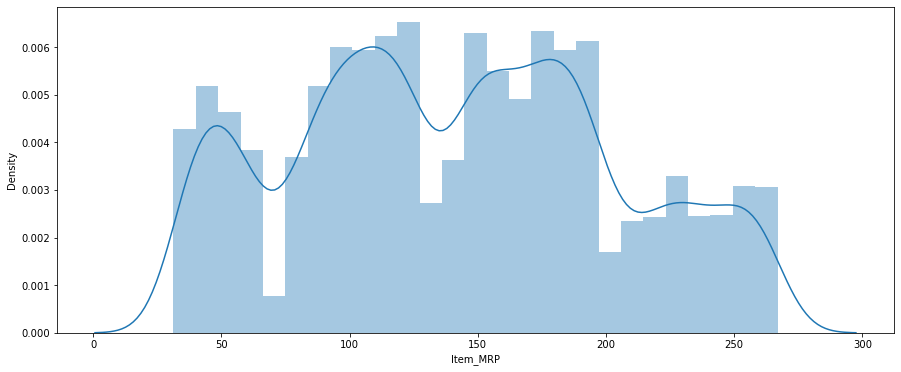

In [51]:
sns.distplot(df['Item_MRP'])
plt.show()

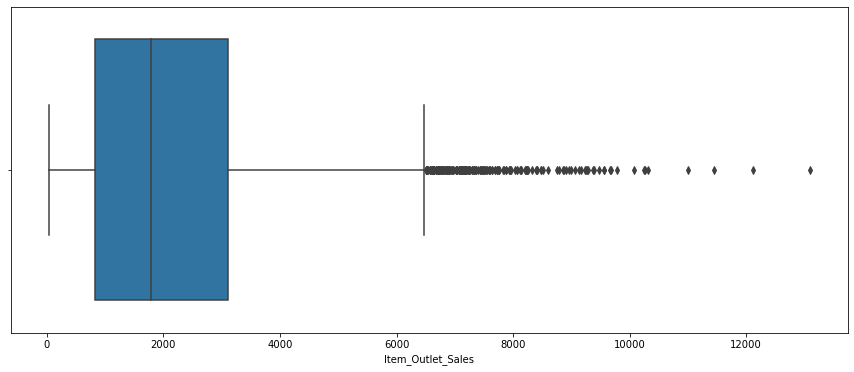

In [52]:
sns.boxplot(df['Item_Outlet_Sales'])
plt.show()


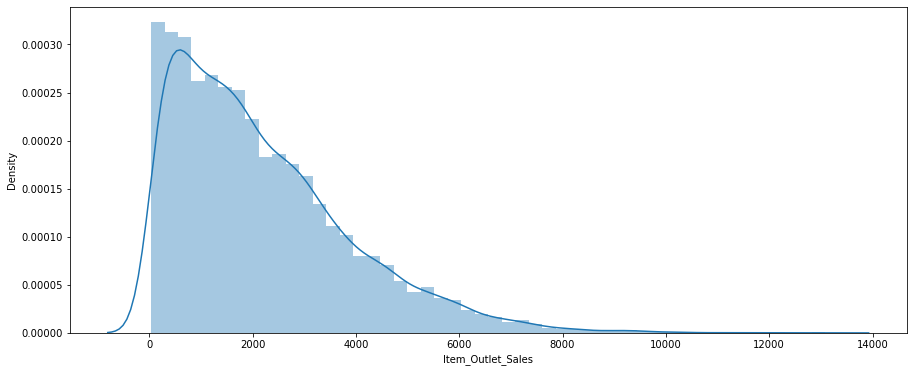

In [53]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()


In [54]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

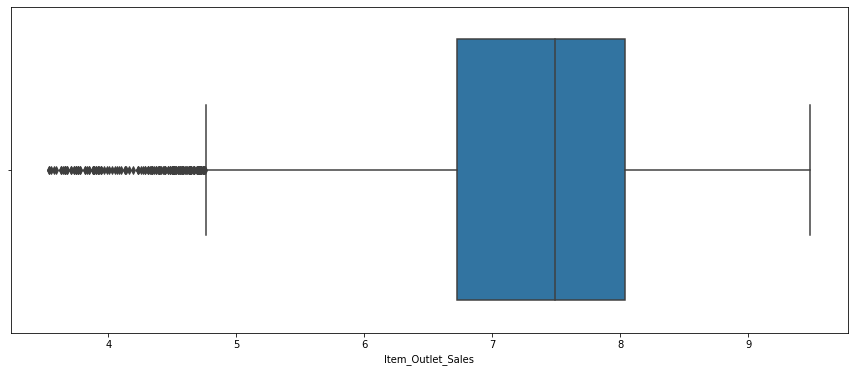

In [55]:
sns.boxplot(df['Item_Outlet_Sales'])
plt.show()

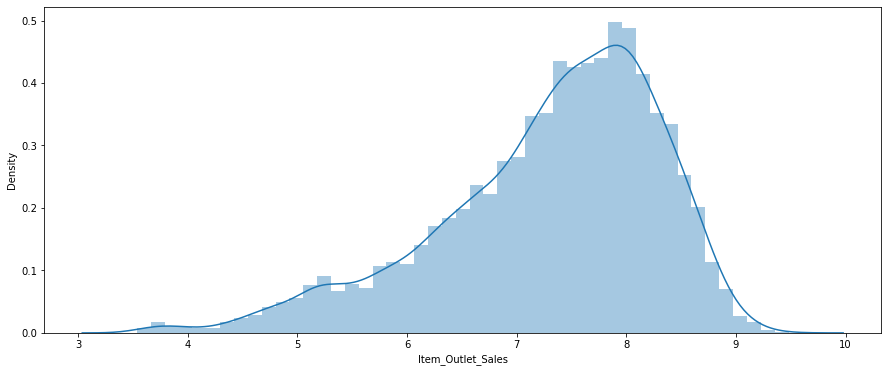

In [56]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

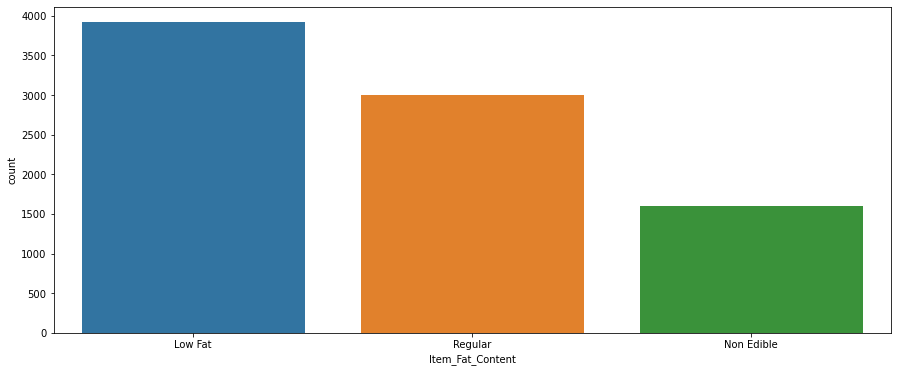

In [57]:
sns.countplot(df["Item_Fat_Content"])
plt.show()


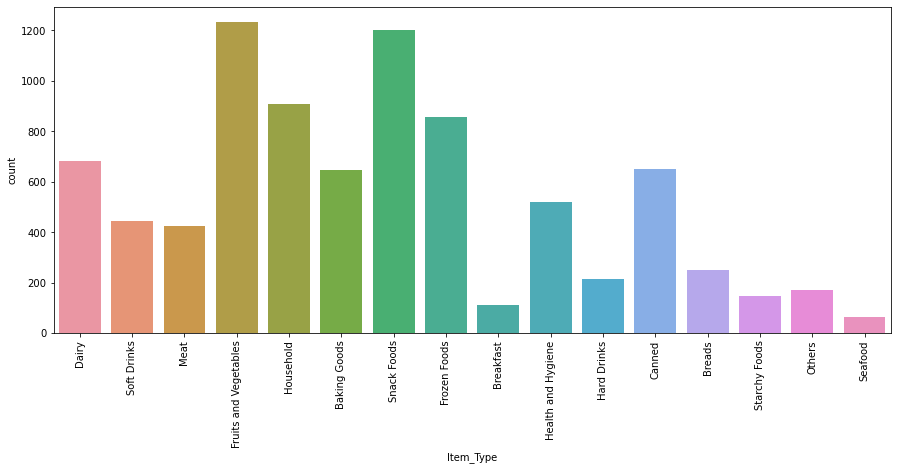

In [58]:
chart= sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels= list(df['Item_Type'].unique()), rotation= 90)
plt.show()

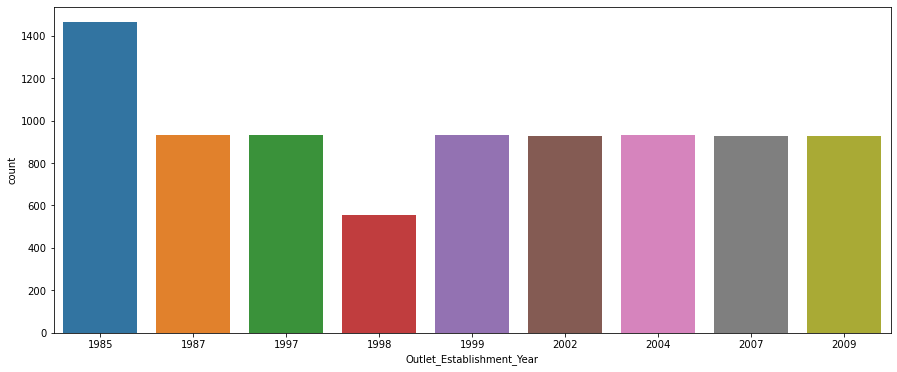

In [59]:
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()


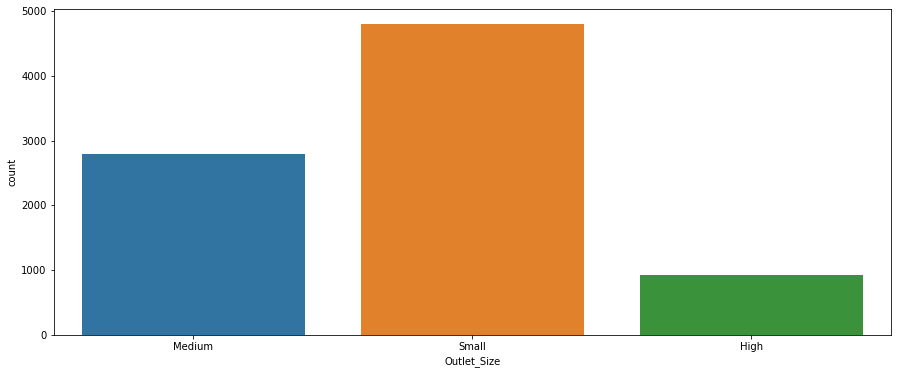

In [60]:
sns.countplot(df['Outlet_Size'])
plt.show()


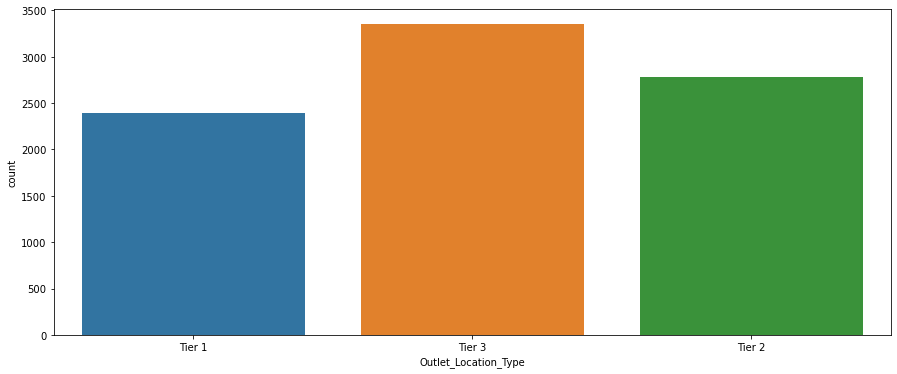

In [61]:
sns.countplot(df['Outlet_Location_Type'])
plt.show()


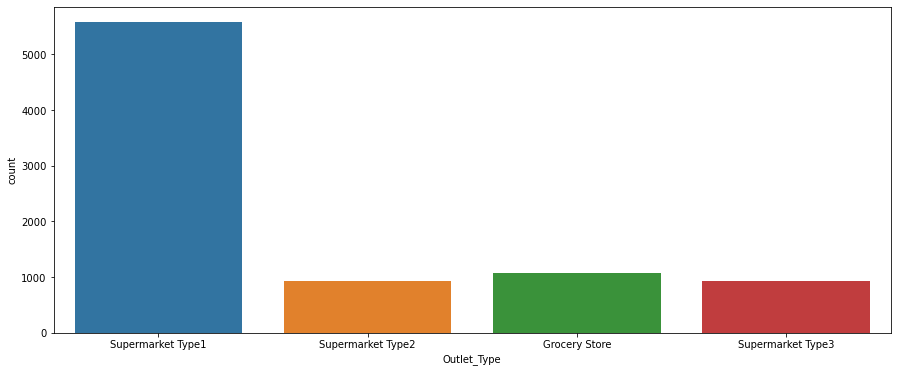

In [62]:
sns.countplot(df['Outlet_Type'])
plt.show()


In [63]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.016981,0.024756,-0.008301,0.008059,0.008301
Item_Visibility,-0.016981,1.000000,-0.001024,-0.051922,-0.151906,0.051922
Item_MRP,0.024756,-0.001024,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.008301,-0.051922,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008059,-0.151906,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.008301,0.051922,-0.005020,-1.000000,-0.077032,1.000000


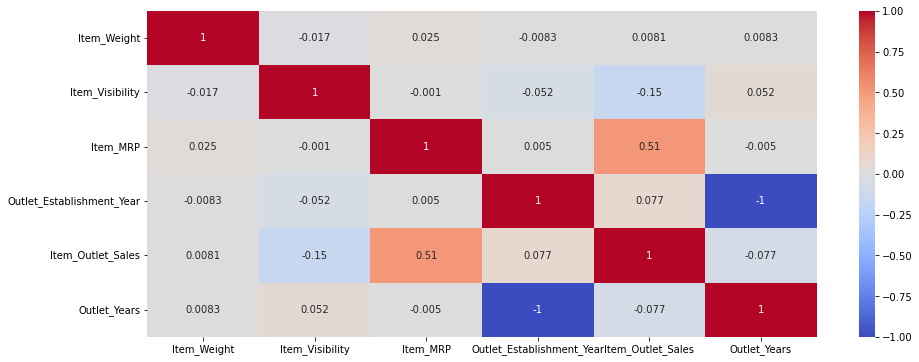

In [64]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item,Outlet_Years
0,FDA15,9.30,Low Fat,-1.794598,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,23
1,DRC01,5.92,Regular,-1.714933,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,13
2,FDN15,17.50,Low Fat,-1.775724,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,23
3,FDX07,19.20,Regular,-1.179588,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,24
4,NCD19,8.93,Non Edible,-1.179588,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,35


In [66]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

In [67]:
cat= ['Outlet_Identifier','Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'new_item']
for col in cat:
    df[col] = label.fit_transform(df[col])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item,Outlet_Years
0,FDA15,9.30,0,-1.794598,4,249.8092,9,1999,1,0,1,8.225808,1,23
1,DRC01,5.92,2,-1.714933,14,48.2692,3,2009,1,2,2,6.096776,0,13
2,FDN15,17.50,0,-1.775724,10,141.6180,9,1999,1,0,1,7.648868,1,23
3,FDX07,19.20,2,-1.179588,6,182.0950,0,1998,2,2,0,6.597664,1,24
4,NCD19,8.93,1,-1.179588,9,53.8614,1,1987,0,2,1,6.903451,2,35


In [68]:
len(df.columns)

14

In [69]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'new_item'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,new_item_0,new_item_1,new_item_2
0,FDA15,9.30,-1.794598,4,249.8092,9,1999,8.225808,23,1,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,-1.714933,14,48.2692,3,2009,6.096776,13,0,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,-1.775724,10,141.6180,9,1999,7.648868,23,1,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,-1.179588,6,182.0950,0,1998,6.597664,24,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,-1.179588,9,53.8614,1,1987,6.903451,35,0,...,0,0,1,0,1,0,0,0,0,1


In [70]:
x = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Item_Outlet_Sales'])
x.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,new_item_0,new_item_1,new_item_2
0,9.30,-1.794598,4,249.8092,9,23,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,-1.714933,14,48.2692,3,13,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,-1.775724,10,141.6180,9,23,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,-1.179588,6,182.0950,0,24,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,-1.179588,9,53.8614,1,35,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [71]:
x_columns= x.columns
x_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'new_item_0',
       'new_item_1', 'new_item_2'],
      dtype='object')

In [72]:
y = df['Item_Outlet_Sales']
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [73]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
x

array([[-0.84187169, -1.59432679, -0.76647929, ..., -0.32162682,
         0.62570776, -0.48055788],
       [-1.64170589, -1.35444115,  1.6089627 , ...,  3.10919344,
        -1.59819018, -0.48055788],
       [ 1.09855449, -1.53749379,  0.6587859 , ..., -0.32162682,
         0.62570776, -0.48055788],
       ...,
       [-0.53424315, -0.56759906,  0.1836975 , ..., -0.32162682,
        -1.59819018,  2.08091479],
       [-1.33644372,  1.28625282,  1.3714185 , ..., -0.32162682,
         0.62570776, -0.48055788],
       [ 0.45963367, -0.24942827,  1.6089627 , ...,  3.10919344,
        -1.59819018, -0.48055788]])

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
print (x_train.shape, x_test.shape ,  y_train.shape, y_test.shape)

(5966, 22) (2557, 22) (5966,) (2557,)


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, x, y):
    # training the model
    model.fit(x, y)
    
    pred = model.predict(x)
    # perform cross-validation
    cv_score = cross_val_score(model, x, y, cv=5)
    cv_score = cv_score.mean()
    
    print("Model Report")
    print("CV Score:", cv_score)
    print("R2_Score:", r2_score(y,pred))

Model Report
CV Score: 0.7182637658640019
R2_Score: 0.7218469330235937
Outlet_Size_2            -8.333243e+10
Outlet_Size_1            -7.885579e+10
Outlet_Size_0            -5.242981e+10
Outlet_Years             -6.783615e-01
Item_Visibility          -6.425514e-03
Item_Weight              -1.074475e-03
Item_Type                 4.875801e-03
Outlet_Identifier         1.970996e-01
Item_MRP                  5.213911e-01
new_item_0                8.953086e+10
Outlet_Type_2             9.436738e+10
Outlet_Type_3             9.467896e+10
Outlet_Type_0             1.008985e+11
new_item_1                1.381198e+11
Outlet_Type_1             1.440790e+11
new_item_2                1.960724e+11
Item_Fat_Content_1        2.202288e+11
Outlet_Location_Type_0    3.455522e+11
Outlet_Location_Type_1    3.608960e+11
Item_Fat_Content_2        3.627422e+11
Outlet_Location_Type_2    3.758226e+11
Item_Fat_Content_0        3.783547e+11
dtype: float64


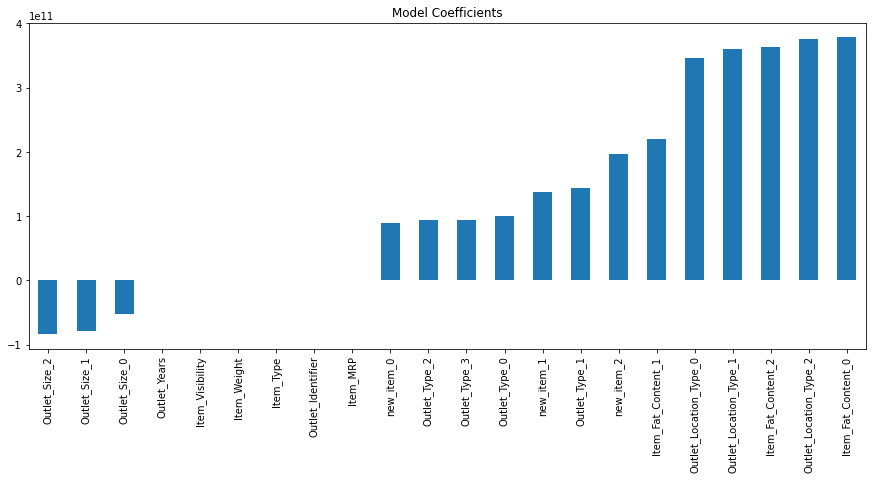

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, x_train, y_train)
coef = pd.Series(model.coef_, x_columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
CV Score: 0.582387720697997
R2_Score: 0.5839480146776521


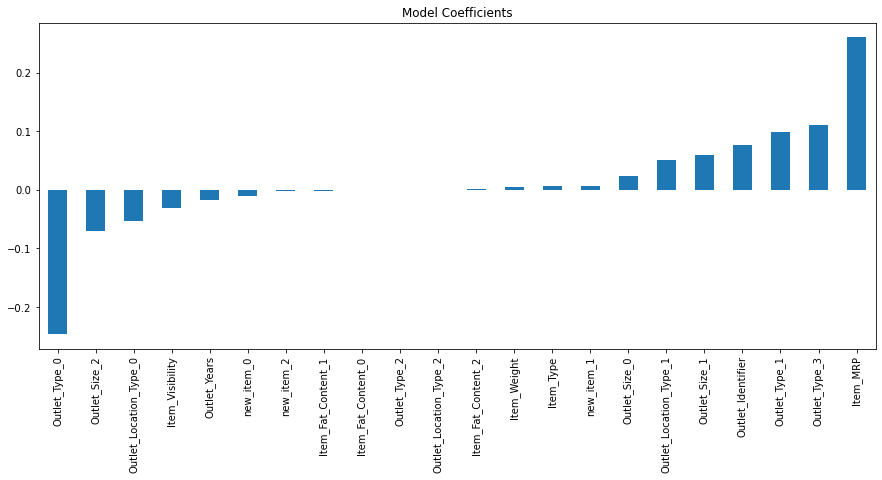

In [77]:
model = Ridge(normalize=True)
train(model, x_train, y_train)
coef = pd.Series(model.coef_, x_columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
CV Score: -0.00019178977176310675
R2_Score: 0.0


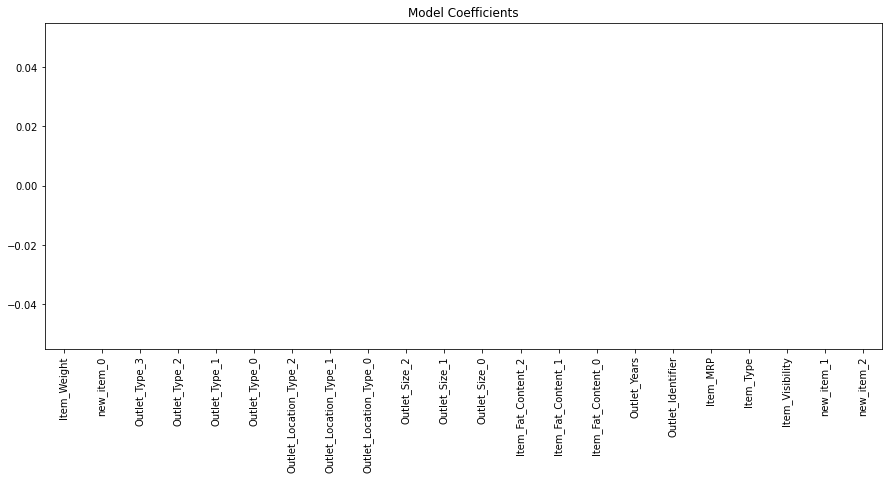

In [78]:
model = Lasso()
train(model, x_train, y_train)
coef = pd.Series(model.coef_, x_columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

Model Report
CV Score: 0.4388828429772741
R2_Score: 1.0


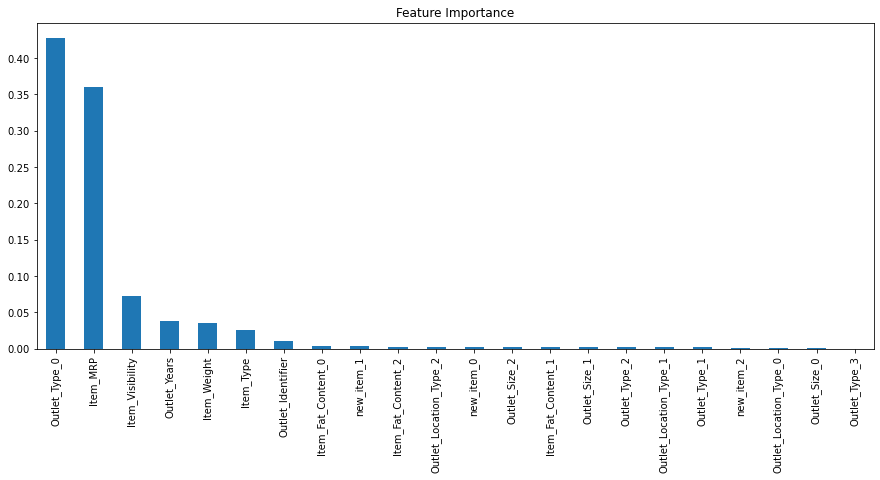

In [79]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x_train, y_train)
coef = pd.Series(model.feature_importances_, x_columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
CV Score: 0.7037828107530306
R2_Score: 0.9587811566439493


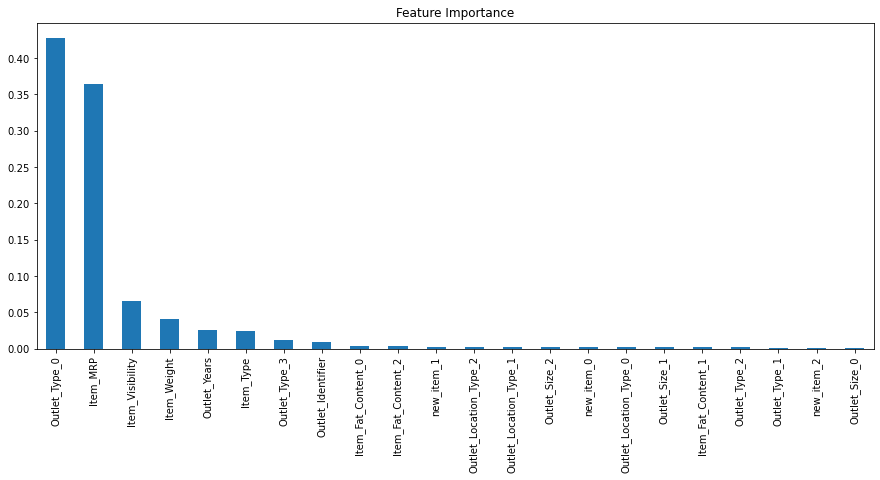

In [80]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x_train, y_train)
coef = pd.Series(model.feature_importances_, x_columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
CV Score: 0.6850174141641854
R2_Score: 1.0


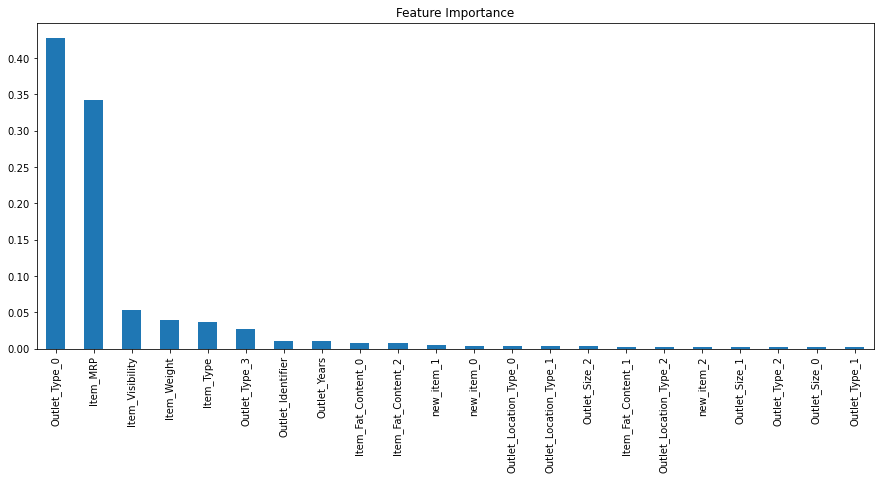

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x_train, y_train)
coef = pd.Series(model.feature_importances_, x_columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
CV Score: 0.7252215291681149
R2_Score: 0.8147070373273481


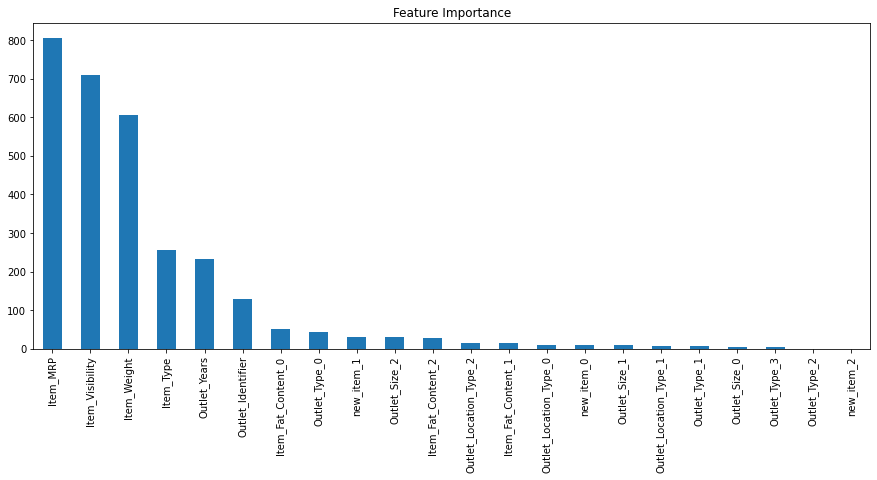

In [82]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, x_train, y_train)
coef = pd.Series(model.feature_importances_, x_columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Model Report
CV Score: 0.6913410505905327
R2_Score: 0.8963399633683027


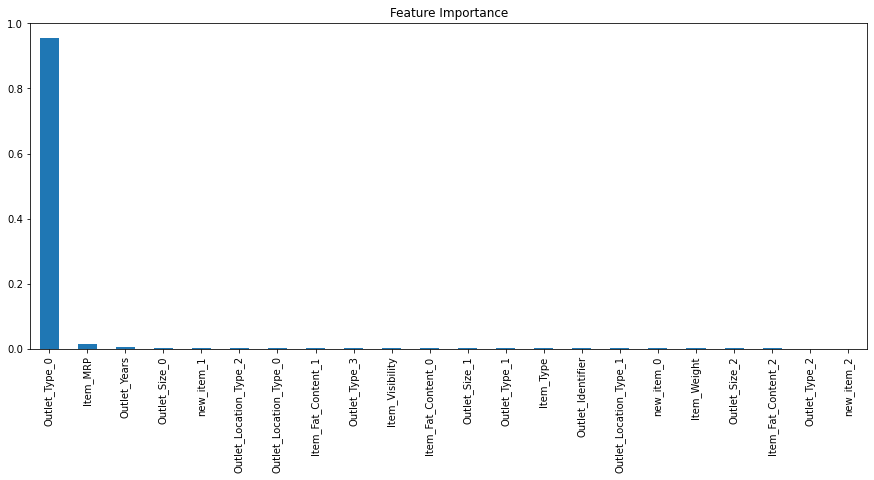

In [83]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model,x_train, y_train)
coef = pd.Series(model.feature_importances_, x_columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [86]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [87]:
rf = RandomForestRegressor()

In [88]:
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
display (rf.fit(x_train, y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   1.1s
[CV] END max_depth=5

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(x_test)
display (r2_score (y_test,predictions))
display (predictions)        

{'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
-0.27101464503736045


0.7253443581430148

array([8.34158981, 7.27844906, 7.88904143, ..., 6.07016808, 5.0493135 ,
       7.88904143])

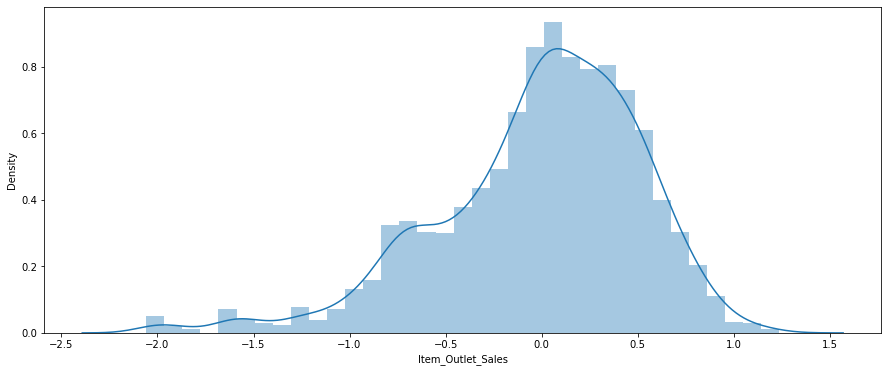

In [90]:
sns.distplot(y_test-predictions)
plt.show()

In [97]:
from scipy.stats import uniform, randint
params = {
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [98]:
lgb=LGBMRegressor()

In [99]:
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.14236203565420874, max_depth=2, n_estimators=114, subsample=0.892797576724562; total time=   0.0s
[CV] END learning_rate=0.14236203565420874, max_depth=2, n_estimators=114, subsample=0.892797576724562; total time=   0.0s
[CV] END learning_rate=0.14236203565420874, max_depth=2, n_estimators=114, subsample=0.892797576724562; total time=   0.0s
[CV] END learning_rate=0.14236203565420874, max_depth=2, n_estimators=114, subsample=0.892797576724562; total time=   0.0s
[CV] END learning_rate=0.14236203565420874, max_depth=2, n_estimators=114, subsample=0.892797576724562; total time=   0.0s
[CV] END learning_rate=0.20959754525911098, max_depth=4, n_estimators=118, subsample=0.6399899663272012; total time=   0.0s
[CV] END learning_rate=0.20959754525911098, max_depth=4, n_estimators=118, subsample=0.6399899663272012; total time=   0.0s
[CV] END learning_rate=0.20959754525911098, max_depth=4, n_estimators=118, s

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021D786146D0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021D785D0280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021D78614CA0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021D7863CC40>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [100]:
print(lgb.best_params_)
print(lgb.best_score_)
predictions=lgb.predict(x_test)
display (r2_score (y_test,predictions))
display (predictions)    

{'learning_rate': 0.14236203565420874, 'max_depth': 2, 'n_estimators': 114, 'subsample': 0.892797576724562}
-0.269812275348667


0.7299745753352027

array([8.3158723 , 7.28798474, 7.948993  , ..., 6.01549781, 4.98074401,
       7.96318649])

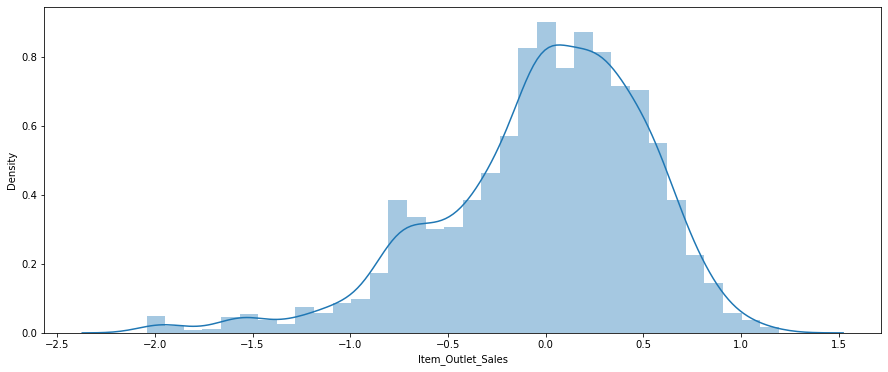

In [101]:
sns.distplot(y_test-predictions)
plt.show()

In [102]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [104]:
xgb = RandomizedSearchCV(estimator = XGBRegressor(), param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.5s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.5s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen obje

In [105]:
print(xgb.best_params_)
print(xgb.best_score_)
predictions=xgb.predict(x_test)
display (r2_score (y_test,predictions))
display (predictions) 

{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.2681154113033112


0.7303643984592443

array([8.34486  , 7.2901006, 7.953637 , ..., 6.017138 , 4.914955 ,
       7.9478374], dtype=float32)

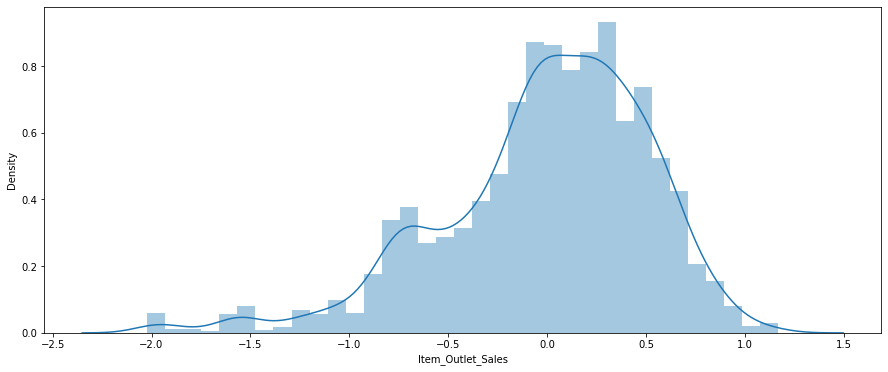

In [106]:
sns.distplot(y_test-predictions)
plt.show()